# Análisis de componentes principales (PCA)

## RafaCastle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from mlxtend.plotting  import plot_decision_regions

## Descripción del Dataset

Se escogió el dataset sobre pizzas de los dataset disponibles (link: https://data.world/sdhilip/pizza-datasets), el cual contiene las siguientes columnas, que buscan describir el tipo de cosas que hacen que una pizza sea sabrosa:

1.    brand - Marca de pizza 
2.    id - Muestra analizada
3.    mois - Cantidad de agua por 100 gramos en la muestra
4.    prot - Cantidad de proteína por 100 gramos en la muestra
5.    fat: cantidad de grasa por 100 gramos en la muestra
6.    ash - Cantidad de ceniza por 100 gramos en la muestra
7.    sodium: cantidad de sodio por cada 100 gramos de la muestra
8.    carb: cantidad de carbohidratos por cada 100 gramos en la muestra
9.    cal - Cantidad de calorías por cada 100 gramos en la muestra

Las pizzas se catalogarán esperando predecir cuál será el valor de brand dependiendo de sus demás características.

In [2]:
df=pd.read_csv("pizza.csv")
df.head()

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67


## Limpieza de datos

Transformando la columna brand a enteros, es decir $A \to 1$, $B \to 2$ , etc. 

In [3]:
lab=LabelEncoder()
df["brand"] = df["brand"].astype("category")
lab.fit(df["brand"].drop_duplicates())
df["brand"] = lab.transform(df["brand"])
df["brand"]=df["brand"]+1
df["brand"].astype("int64")
df.head()

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,1,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,1,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,1,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,1,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,1,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   brand   300 non-null    int32  
 1   id      300 non-null    int64  
 2   mois    300 non-null    float64
 3   prot    300 non-null    float64
 4   fat     300 non-null    float64
 5   ash     300 non-null    float64
 6   sodium  300 non-null    float64
 7   carb    300 non-null    float64
 8   cal     300 non-null    float64
dtypes: float64(7), int32(1), int64(1)
memory usage: 20.0 KB


No hay valores nulos, por lo tanto concluímos con la limpieza

## Aplicando PCA

Por ahora vamos a aplicar PCA con la matriz de covarianzas dada por Numpy, pero en la siguiente sección construiremos a la matriz de covarianzas desde 0 y la compararemos con la función Numpy.cov para corroborar nuestros resultados.

In [5]:
X, y = df.iloc[:,2:].values, df.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [6]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [7]:
cov_mat = np.cov(X_train_std.T)

In [8]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
eigen_vals

array([4.18674320e+00, 2.29528454e+00, 4.29601134e-01, 9.66678465e-02,
       2.47060218e-02, 4.80762750e-04, 9.32235363e-06])

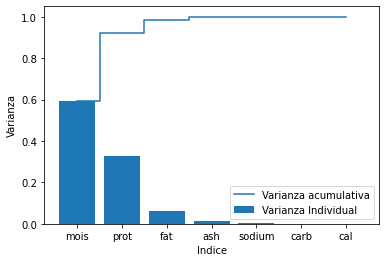

In [9]:
tot = sum(eigen_vals)
var_exp = [ev/tot for ev in sorted(eigen_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(list(df.columns[2:]), var_exp, label = "Varianza Individual", align = "center")
plt.step(list(df.columns[2:]), cum_var_exp, where= "mid", label = "Varianza acumulativa")
plt.xlabel("Indice")
plt.ylabel("Varianza")
plt.legend(loc = "best")
plt.show()

In [10]:
eigen_par = [(np.abs(eigen_vals[i]), eigen_vecs[i])
              for i in range (len(eigen_vals))]
eigen_par.sort(key = lambda k:k[0], reverse = True)

In [11]:
W = np.hstack((eigen_par[0][1][:, np.newaxis],
               eigen_par[1][1][:,np.newaxis]))
W

array([[ 0.08638457,  0.37311177],
       [ 0.6236617 ,  0.27115289],
       [ 0.4201704 , -0.76275875],
       [ 0.22351392, -0.00794243],
       [ 0.01948257,  0.36162011],
       [-0.45278202, -0.00151341],
       [-0.41435615, -0.27318187]])

In [12]:
print("Original : ", X_train_std)
print ("Proyectada : ", X_train_std.dot(W))

Original :  [[ 0.46087815 -0.43229168 -0.32788138 ... -0.15235371  0.0843901
  -0.51426682]
 [-1.29317005 -0.85997113 -0.14019227 ... -0.63998877  1.11642946
   0.78234207]
 [-0.54998266 -0.8961352  -0.27537312 ... -0.53162543  0.80278668
   0.2078951 ]
 ...
 [ 0.54065533  1.32559664  0.64072848 ...  0.17273634 -1.17349415
   0.01094185]
 [-0.84494828  1.0834546   2.19028081 ...  2.7734567  -1.16576351
   1.96406156]
 [ 0.69811028 -0.42757462 -0.40608517 ... -0.15235371 -0.00395998
  -0.72763284]]
Proyectada :  [[-2.39286820e-01  3.91653548e-01]
 [-1.76233656e+00 -1.04801395e+00]
 [-1.38812351e+00 -4.81084555e-01]
 [-1.57771696e+00 -9.32286617e-01]
 [-1.36860903e+00  7.32277276e-02]
 [-1.71325266e-01  7.00238939e-01]
 [ 1.24140196e+00 -1.01316538e-01]
 [ 1.71847301e+00 -1.64178868e+00]
 [ 2.04081489e+00  4.39062366e-01]
 [ 1.14945952e+00 -2.82183640e-02]
 [-1.47211093e+00 -1.20041331e-01]
 [-1.45393535e+00  1.17898214e+00]
 [-1.58901012e+00 -1.67987737e-01]
 [-1.78787298e+00 -9.3220446

In [13]:
print("Original : ", X_train_std[0])
print ("Proyectada : ", X_train_std[0].dot(W))

Original :  [ 0.46087815 -0.43229168 -0.32788138 -0.19524876 -0.15235371  0.0843901
 -0.51426682]
Proyectada :  [-0.23928682  0.39165355]


In [14]:
X_train_pca = X_train_std.dot(W)

In [15]:
set(df["brand"])

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

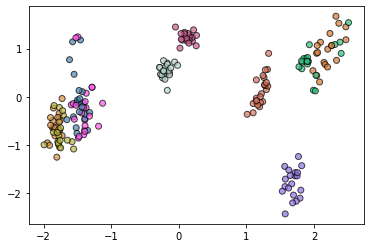

In [16]:
# Arreglo de 10 colores aleatorios
colors = [""]
for i in range(1,11):
    colors.append('#%06X' % randint(0, 0xFFFFFF))
colors=np.array(colors)

plt.scatter(X_train_pca[:,0], X_train_pca[:, 1],
            alpha =0.7, c = colors[y_train], edgecolor = "black");

In [17]:
pca = PCA(n_components= 2)
lr = LogisticRegression(multi_class = "auto", solver = "liblinear")

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr.fit(X_train_pca, y_train)

LogisticRegression(solver='liblinear')

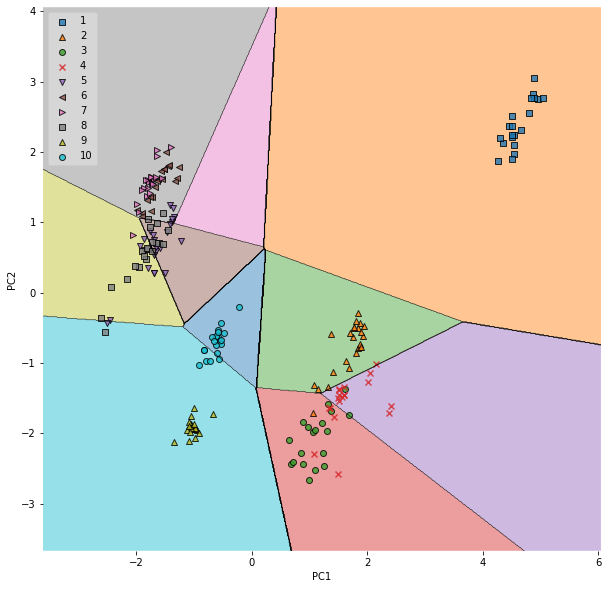

In [18]:
plt.figure(figsize=(10,10))
plot_decision_regions(X_train_pca, y_train, clf = lr, legend = 2)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

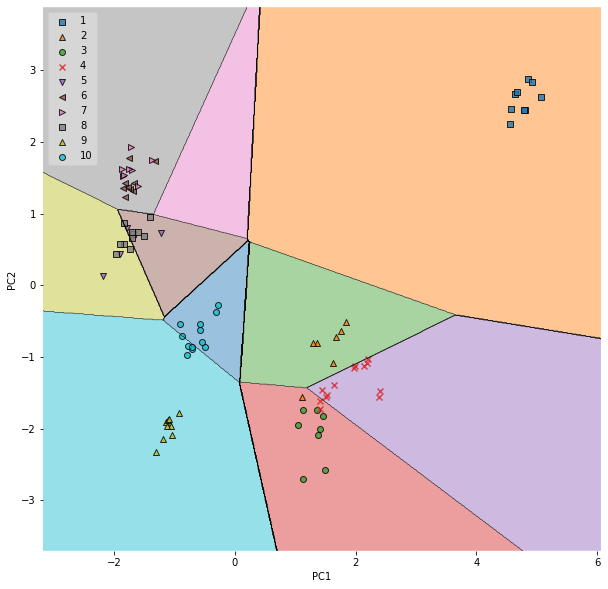

In [19]:
plt.figure(figsize=(10,10))
plot_decision_regions(X_test_pca, y_test, clf = lr, legend = 2)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

## Reflexión

En general se muestra una buena agrupación para los valores extremos tanto para el conjunto de prueba como para el de entrenamiento, con un error marcado para las categorías intermedias. Esto puede reflejar lo dificil que es categorizar para una persona el sabor de pizzas que no son del todo sabrosas, pero tampoco saben mal. Por lo que se concluye que la calificación de la pizza se puede predecir satisfactoriamente para calificaciones altas (pizzas con un excelente sabor) o muy bajas (pizzas que saben mal) de manera numérica por los parámetros mencionados. Se propondría dividir las pizzas en menos categorías, por ejemplo 4 o 5 para que fuera más fácil categorizarla de manera subjetiva.

# Matriz de covarianzas

Buscamos construir desde 0 la matriz de covarianzas, la calcularemos para el siguiente arreglo, pero con el método generado en este trabajo se podrá obtener para cualquier arreglo:

In [20]:
arreglo=X_train_std.T
arreglo

array([[ 0.46087815, -1.29317005, -0.54998266, ...,  0.54065533,
        -0.84494828,  0.69811028],
       [-0.43229168, -0.85997113, -0.8961352 , ...,  1.32559664,
         1.0834546 , -0.42757462],
       [-0.32788138, -0.14019227, -0.27537312, ...,  0.64072848,
         2.19028081, -0.40608517],
       ...,
       [-0.15235371, -0.63998877, -0.53162543, ...,  0.17273634,
         2.7734567 , -0.15235371],
       [ 0.0843901 ,  1.11642946,  0.80278668, ..., -1.17349415,
        -1.16576351, -0.00395998],
       [-0.51426682,  0.78234207,  0.2078951 , ...,  0.01094185,
         1.96406156, -0.72763284]])

La matriz de covarianzas dada por numpy aplicada a este dataset es de la forma:

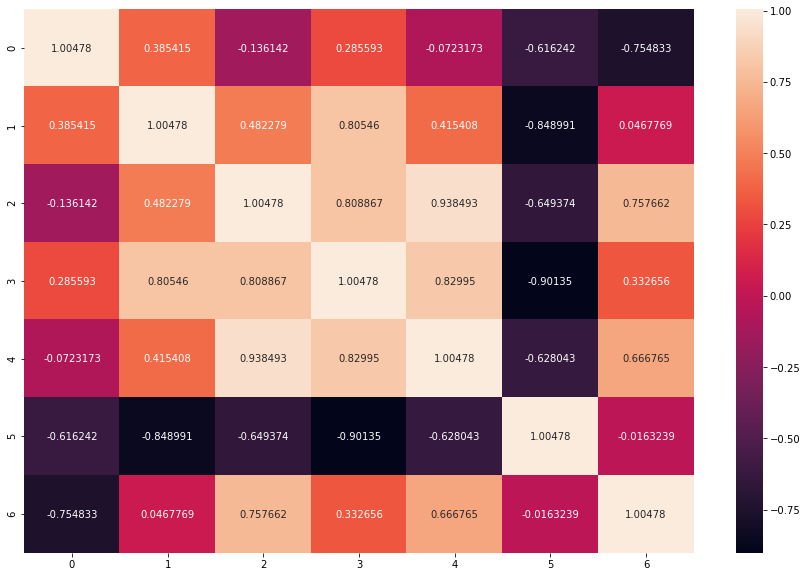

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(cov_mat, annot=True, fmt='g');

Construyamos dicha matriz desde 0, sabemos que debe tener la forma:

$$
\Sigma = \begin{pmatrix}
Cov(X_1,X_1) & Cov(X_1,X_2) &  \cdots  & Cov(X_1,X_m) \\
Cov(X_2,X_1) & Cov(X_2,X_2) &  \cdots  & Cov(X_2,X_m) \\
\vdots & \ddots & \ddots & \vdots \\
Cov(X_m,X_1) & Cov(X_m,X_2) &  \cdots  & Cov(X_n,X_m) \\
\end{pmatrix}
$$

si $x^i_k$ es el elemento k-ésimo de $X_i$ y $n$ es en número de elementos de las variables aleatorias $X_i$, entonces sabemos que la covarianza entre $X_i$ y $X_j$ puede escribirse como:

$$
Cov(X_i,X_j) = \frac{1}{n-1} \sum_{k=1}^{n} (x^i_k-\overline{X_i})(x^j_k-\overline{X_j})
$$

En la siguiente celda obtendremos los promedios $\overline{X_i}$ para las variables aleatorias del arreglo y guardemoslas en una lista:

In [22]:
promedios=[]
for i in arreglo:
    promedios.append(np.mean(i))
promedios=np.array(promedios)

Ahora obtengamos las restas $(x^i_k-\overline{X_i})$ y guardemoslas en una lista

In [23]:
restas=[]
m=len(arreglo)
for i in range(m):
    restas.append(arreglo[i]-promedios[i])
restas=np.array(restas)

Ahora obtengamos a la matriz de covarianzas, para esto primero obtengamos el valor $N=n-1$ ($n$ es el número de elementos en las variables aleatorias) y dividamoslo entre la multiplicacion de las restas que ya teníamos guardadas para obtener:

$$
Cov(X_i,X_j) = \frac{1}{n-1} \sum_{k=1}^{n} (x^i_k-\overline{X_i})(x^j_k-\overline{X_j})
$$

In [24]:
N=arreglo.shape[1]-1
matriz_covarianza=np.zeros((m,m))
for i in range(m):
    for j in range(m):
        matriz_covarianza[i][j]=np.matmul(restas[i][np.newaxis],restas[j][np.newaxis].T)[0][0]/N

Esta es la matriz de covarianzas obtenida mediante nuestro método:

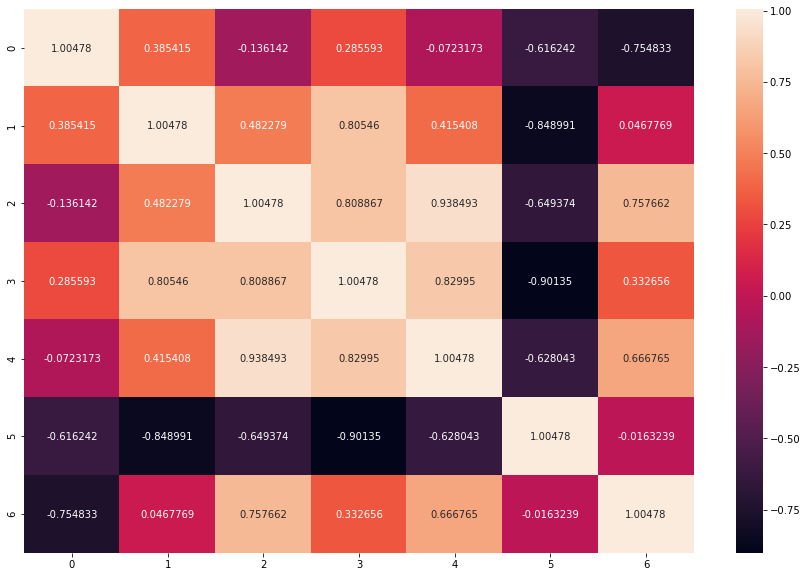

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(matriz_covarianza, annot=True, fmt='g');

## Reflexión

Para verificar las diferencias de las matrices obtenidas mediante ambos métodos, resultará útil restarlas:

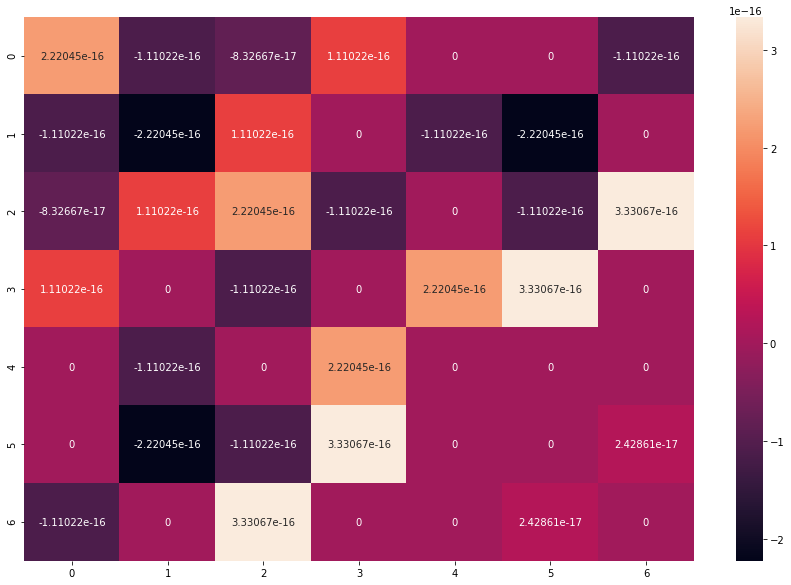

In [26]:
dif=matriz_covarianza-cov_mat
plt.figure(figsize=(15,10))
sns.heatmap(dif, annot=True, fmt='g');

In [27]:
abs(dif).max()

3.3306690738754696e-16

Vemos que las diferencias son muy pequeñas, van del orden de $10^{-16}$ a 0 para algunas entradas, por lo que se concluye que el método desarrollado es confiable.